# Introduction to Recurrent Neural Networks

### Machine Learning 410
### Steve Elston

## 1.0 Introduction to neural networks

In this lesson you will explore **recurrent neural networks (RNNs)**. Recurrent neural networks use a distinctive model which is suitable for sequence data. Sequence data can include human speech, natural language, and numerical time series. Natural language applications include machine translation and question response systems. RNNs can also be applied to multi-dimensional data. For example, RNNs are used to caption images.    

### 1.1 Basic recurrence relationships for neural networks

**Recurrent neural networks (RNNs)** use recurrence operations to operate on **sequences**. But, what do we mean by a recurrence? Simply put, recurrent functions are functions that call themselves to process values of a sequence. 

Let's look at a simple example. Start with a function that operates on a value at one time step to compute an output at the next time step. We can write such a function as follows:

$$s^{(t)} = f(s^{(t-1)}; \theta)$$

This apply this functional relation once again applied again to compute the output at the next time step. This relationship can be written as follows.

$$s^{(t+1)} = f(f(s^{(t-1)}; \theta); \theta)$$

### 1.2 Basic recurrent neural network architecture

How to we create a neural network with a recurrence relationship? A single hidden layer recurrent neural network is illustrated in Figure 1.1 below. The hidden layer of this network has a recurrent or feedback path.    

<img src="img/Recurrent1.jpg" alt="Drawing" style="width:200px; height:400px"/>
<center>**Figure 1.1. Basic architecture of a recurrent process**</center>

Figure 1.1 illustrates the concept of an RNN. But, how can this architecture be used to perform actual compuations? The answer is to **unfold** the recurrence relationship. This unfolding is illustrated in Figure 1.2. Notice that the unfolded network represents a long sequence of calculations.  

<img src="img/Unfolded1.jpg" alt="Drawing" style="width:450px; height:400px"/>
<center>**Figure 1.2. Unrolled basic recurrent process**</center>

The capital letters in Figure 1.2 represent weight tensors of the model. It is these weight tensors that must be learned when training an RNN. Typcially, these weight tensors are learned by using **back propagation through time (BPTT)**. BPTT is a generalization of the general back propagation algorithm. 

Given these weight tensors the feed-forward calculation for a multinomial classifier RRN can be writen as follows:  

$$a^{(t)} = b + W h^{(t-1)} + Ux^{(t)}\\
h^{(t)} = tanh(a^{(t)})\\
o^{(t)} = c + Vh^{(t)}\\
\hat{y}^{(t)} = softmax(o^{(t)})$$

These relationships are relatively complex. This is especially the case when comparied to the basic fully-connected networks. 

Notice that the weight tensors of the RNN are the same at each time step. This fact has two important implications.
1. These **Shared weight** tensors are learned. This makes the training of RNNs tractable. Furhter, the statistical strenght of the training is increased. 
2. The RNN can only be used to model **stationary** sequences. A stationary sequence has statistical properties (e.g. variance) that are **invariant with time**.  

### 1.3 Recurrent network with single output

The RNN architecture illustrated  

<img src="img/RNNwithSingOutput.JPG" alt="Drawing" style="width:500px; height:400px"/>
<center>**Figure 1.3. RNN with single output**</center>



## 2.0 Text example with Keras

Let's see how some of this theory works in practice using Keras. Execute the code in the cell below to load the required packages.

In [1]:
from keras import layers
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, SimpleRNN, LSTM, GRU, Bidirectional
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\StevePC2\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 2.1 Overview of text embedding

In the following examples we will use a feature extraction technique known as **text embedding**. A text embedding layer is often used to extract features before RNN layers are used. This general architecture is shown in Figure 2.1 

<img src="img/Architecture.JPG" alt="Drawing" style="width:250px; height:250px"/>

We will not dive deeply into this topic for this lesson since our focus is on RNNs. However, a bit of background will help you understand what is going on.

There are a great many approaches which have been tried for text analytics and **natural language processing (NLP)**. We will only discuss a few of these models briefly here: 

- The **bag of words model (BOW)** is a simple widely used and suprsingly effective model for analysis of text data. The BOW model assumes **exchangeability** of words. The BOW model depends only on the frequency of the words in the document. The order of the words is not consisdered. Dispite these seamingly rediculous assumptions, the model wo rks well in many cases. The end product of applying the BOW model is a term-document or document-term matrix. The tdm, or dtm is a structured representation of word frequency by document. The tdm or dtm can be used for classification if lables are available or clustering for unspervised learning. 
- The **N-gram** model uses all possible sequences of N words  
- Another widely used model is of **Part of Speech (PoS) Tagging**. PoS tagging attempts to label or anotate words in a corpus (e.g. a collection of documents) as, say nouns, verbs, pronouns, etc. PoS tagging is beyond the  scope of this Lesson. The PoS tagger creates a tree of the relationship of words in say a sentance. One useful specialization of PoS tagging is named entity recognition, which attempts to find proper nouns. 

Other powerful models are the **word to vec** and **doc to vec** models. Word to vec, uses a neural network model to determine similarity between words. These models are beyond the scope of this tutorial. You can find a good introduction to this model in the 


![](img/Embedding.JPG)

[article by Rong](https://arxiv.org/pdf/1411.2738.pdf)

### 2.2 Text embedding example

Let's try a simple sentiment classifier using text embedding. We will try sentiment analysis of movie review text using the IMDB dataset built into Keras. This dataset includes the full text of a number of movie reviews, along with labels indicating if the review has positive of negative sentiment. 

The code in the cell below performs the following steps:
1. Loads the IMDB data into train and test subsets.
2. Pads the squence of words in each review so that all sequences have the same length. Padding is required so that Keras neural networks can operate on the input. 
3. Prints some summary information on the result.

In [2]:
max_features = 10000
max_len = 250
(train_text, train_labels), (test_text, test_labels) = imdb.load_data(num_words = max_features)
train_text = preprocessing.sequence.pad_sequences(train_text, maxlen = max_len)
test_text = preprocessing.sequence.pad_sequences(test_text, maxlen = max_len)
print(len(train_text))
print(train_text[1][250:])

25000
[]


In [3]:
embedding = Sequential()
## First add an embedding layer
embedding.add(Embedding(10000, 8, input_length = max_len))
## Flatten the embedding of the features
embedding.add(Flatten())
## Now the  binary classifier layer
embedding.add(Dense(1, activation = 'sigmoid'))
embedding.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['acc'])
embedding.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2001      
Total params: 82,001
Trainable params: 82,001
Non-trainable params: 0
_________________________________________________________________


In [4]:
historyEMB = embedding.fit(train_text, train_labels,
                   epochs = 10,
                   batch_size = 256,
                   validation_data = (test_text, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
 1536/25000 [>.............................] - ETA: 15s - loss: 0.6934 - acc: 0.4909

C:\Users\StevePC2\Anaconda3\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102295). Check your callbacks.
  % delta_t_median)


25000/25000 [==============================] - 3s 130us/step - loss: 0.6840 - acc: 0.5778 - val_loss: 0.6530 - val_acc: 0.7111
Epoch 2/10
25000/25000 [==============================] - 1s 60us/step - loss: 0.5551 - acc: 0.7912 - val_loss: 0.4745 - val_acc: 0.8223
Epoch 3/10
25000/25000 [==============================] - 1s 59us/step - loss: 0.3845 - acc: 0.8640 - val_loss: 0.3581 - val_acc: 0.8604
Epoch 4/10
25000/25000 [==============================] - 1s 56us/step - loss: 0.2951 - acc: 0.8914 - val_loss: 0.3126 - val_acc: 0.8714
Epoch 5/10
25000/25000 [==============================] - 1s 56us/step - loss: 0.2482 - acc: 0.9104 - val_loss: 0.2897 - val_acc: 0.8786
Epoch 6/10
25000/25000 [==============================] - 1s 55us/step - loss: 0.2173 - acc: 0.9210 - val_loss: 0.2786 - val_acc: 0.8826
Epoch 7/10
25000/25000 [==============================] - 1s 51us/step - loss: 0.1944 - acc: 0.9308 - val_loss: 0.2743 - val_acc: 0.8853
Epoch 8/10
25000/25000 [===========================

In [7]:
def plot_loss(history):
    '''Function to plot the loss vs. epoch'''
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'Test loss')
    plt.plot(x, train_loss, label = 'Training losss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    
plot_loss(historyEMB)    

NameError: name 'historyEMB' is not defined

In [8]:
def plot_accuracy(history):
    train_acc = history.history['acc']
    test_acc = history.history['val_acc']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'Test accuracy')
    plt.plot(x, train_acc, label = 'Training accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    
plot_accuracy(historyEMB) 

NameError: name 'historyEMB' is not defined

In [7]:
RNN1 = Sequential()
## First add an embedding layer
RNN1.add(Embedding(max_features, 32))
## Now add an RNN layer
RNN1.add(SimpleRNN(32))
## And the classifier layer
RNN1.add(Dense(1, activation = 'sigmoid'))
RNN1.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['acc'])
RNN1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [8]:
historyRNN = RNN1.fit(train_text, train_labels,
                   epochs = 10,
                   batch_size = 1024,
                   validation_data = (test_text, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 13s 531us/step - loss: 0.6808 - acc: 0.5688 - val_loss: 0.6516 - val_acc: 0.6266
Epoch 2/10
25000/25000 [==============================] - 11s 420us/step - loss: 0.5744 - acc: 0.7108 - val_loss: 0.4766 - val_acc: 0.8046
Epoch 3/10
25000/25000 [==============================] - 11s 425us/step - loss: 0.4363 - acc: 0.8150 - val_loss: 0.4911 - val_acc: 0.7656
Epoch 4/10
25000/25000 [==============================] - 13s 510us/step - loss: 0.3769 - acc: 0.8451 - val_loss: 0.4031 - val_acc: 0.8272
Epoch 5/10
25000/25000 [==============================] - 11s 451us/step - loss: 0.3226 - acc: 0.8708 - val_loss: 0.3698 - val_acc: 0.8440
Epoch 6/10
25000/25000 [==============================] - 12s 468us/step - loss: 0.2888 - acc: 0.8868 - val_loss: 0.4445 - val_acc: 0.8091
Epoch 7/10
25000/25000 [==============================] - 11s 450us/step - loss: 0.2565 - acc: 0.9021 - val_loss: 0.

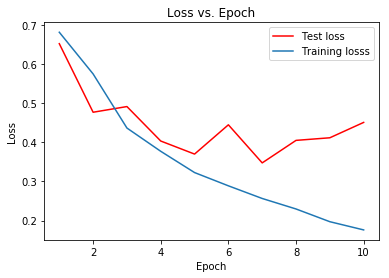

In [9]:
plot_loss(historyRNN)    

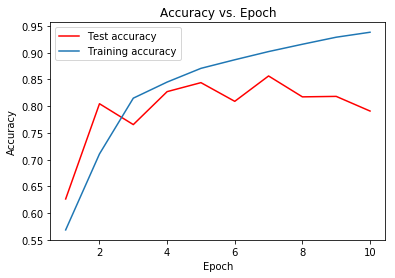

In [10]:
plot_accuracy(historyRNN) 

## X.X Bidirectional RNNs

![](img/Bidirectional1.JPG)
<center>**Architecture of simple bidirectional RNN**</center>


$$a^{(t)} = b + W h^{(t-1)} + Ux^{(t)}\\
i^{(t)} = d + Q g^{(t+1)} + Rx^{(t)}\\
h^{(t)} = tanh(a^{(t)})\\
g^{(t)} = tanh(i^{(t)})\\
o^{(t)} = c + Vh^{(t)} + Sg^{(t)}\\
\hat{y}^{(t)} = softmax(o^{(t)})$$

## X.X Sequence generation with RNNs

<img src="img/SequenceGenRNN.jpg" alt="Drawing" style="width:475px; height:400px"/>
<center>**Sequence generation with RNN**</center>

## X.X Adding depth to RNNs

The RNN architectures we have discussed so far in this lesson have been shallow with only a single recurrent hidden layer. Having a single hidden layer limits the representation capacity of the RNN. 

To overcome the limitations of a single hidden layer

<img src="img/DeepRNN1.jpg" alt="Drawing" style="width:200px; height:400px"/>
<center>**Figure X.X. Basic deep RNN**</center>

<img src="img/DeepRNNSkip.jpg" alt="Drawing" style="width:250px; height:400px"/>
<center>**Figure X.X. RNN with skip connection**</center>



## X.X Regualarization of RNN

In [11]:
RNN2 = Sequential()
## First add an embedding layer
RNN2.add(Embedding(max_features, 32))
## Now add an RNN layer
RNN2.add(GRU(32, dropout=0.1, recurrent_dropout=0.5))
## And the classifier layer
RNN2.add(Dense(1, activation = 'sigmoid'))
RNN2.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['acc'])
RNN2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


In [12]:
historyRNN2 = RNN2.fit(train_text, train_labels,
                   epochs = 10,
                   batch_size = 1024,
                   validation_data = (test_text, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 35s 1ms/step - loss: 0.6775 - acc: 0.6096 - val_loss: 0.6399 - val_acc: 0.6752
Epoch 2/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.5867 - acc: 0.7312 - val_loss: 0.5632 - val_acc: 0.7274
Epoch 3/10
25000/25000 [==============================] - 38s 2ms/step - loss: 0.5188 - acc: 0.7696 - val_loss: 0.5242 - val_acc: 0.7462
Epoch 4/10
25000/25000 [==============================] - 42s 2ms/step - loss: 0.4707 - acc: 0.7949 - val_loss: 0.4980 - val_acc: 0.7546
Epoch 5/10
25000/25000 [==============================] - 49s 2ms/step - loss: 0.4377 - acc: 0.8096 - val_loss: 0.4878 - val_acc: 0.7626
Epoch 6/10
25000/25000 [==============================] - 50s 2ms/step - loss: 0.4153 - acc: 0.8202 - val_loss: 0.4812 - val_acc: 0.7652
Epoch 7/10
25000/25000 [==============================] - 45s 2ms/step - loss: 0.4018 - acc: 0.8282 - val_loss: 0.4900 - val_acc

In [13]:
plot_loss(historyRNN2)   

In [14]:
plot_accuracy(historyRNN2) 

## X.X Long-short term network


![](img/LSTM1.jpg)


In [15]:
GRU1 = Sequential()
## First add an embedding layer
GRU1.add(Embedding(max_features, 32))
## Now add an RNN layer
GRU1.add(GRU(32))
## And the classifier layer
GRU1.add(Dense(1, activation = 'sigmoid'))
GRU1.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['acc'])
GRU1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


In [16]:
historyGRU1 = LSTM1.fit(train_text, train_labels,
                   epochs = 10,
                   batch_size = 1024,
                   validation_data = (test_text, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 40s 2ms/step - loss: 0.6740 - acc: 0.6216 - val_loss: 0.6222 - val_acc: 0.7013
Epoch 2/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.4751 - acc: 0.7826 - val_loss: 0.4252 - val_acc: 0.8122
Epoch 3/10
25000/25000 [==============================] - 30s 1ms/step - loss: 0.3453 - acc: 0.8521 - val_loss: 0.4363 - val_acc: 0.7974
Epoch 4/10
25000/25000 [==============================] - 34s 1ms/step - loss: 0.2926 - acc: 0.8810 - val_loss: 0.3602 - val_acc: 0.8519
Epoch 5/10
25000/25000 [==============================] - 37s 1ms/step - loss: 0.2689 - acc: 0.8921 - val_loss: 0.3554 - val_acc: 0.8546
Epoch 6/10
25000/25000 [==============================] - 31s 1ms/step - loss: 0.2356 - acc: 0.9084 - val_loss: 0.3292 - val_acc: 0.8646
Epoch 7/10
25000/25000 [==============================] - 30s 1ms/step - loss: 0.2188 - acc: 0.9157 - val_loss: 0.3352 - val_acc

In [27]:
plot_loss(historyGRU1)   

NameError: name 'historyGRU1' is not defined

In [20]:
plot_accuracy(historyGRU1) 

NameError: name 'historyGRU1' is not defined

In [23]:
bidirection = Sequential()
## First add an embedding layer
bidirection.add(Embedding(max_features, 32))
## Now add an RNN layer
bidirection.add(Bidirectional(GRU(32)))
## And the classifier layer
bidirection.add(Dense(1, activation = 'sigmoid'))
bidirection.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['acc'])
bidirection.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                12480     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 332,545
Trainable params: 332,545
Non-trainable params: 0
_________________________________________________________________


In [24]:
historyBi = bidirection.fit(train_text, train_labels,
                   epochs = 10,
                   batch_size = 1024,
                   validation_data = (test_text, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 74s 3ms/step - loss: 0.6829 - acc: 0.5894 - val_loss: 0.6534 - val_acc: 0.6807
Epoch 2/10
25000/25000 [==============================] - 74s 3ms/step - loss: 0.5328 - acc: 0.7642 - val_loss: 0.4393 - val_acc: 0.8186
Epoch 3/10
25000/25000 [==============================] - 76s 3ms/step - loss: 0.4148 - acc: 0.8295 - val_loss: 0.3844 - val_acc: 0.8448
Epoch 4/10
25000/25000 [==============================] - 79s 3ms/step - loss: 0.3329 - acc: 0.8664 - val_loss: 0.4914 - val_acc: 0.7479
Epoch 5/10
25000/25000 [==============================] - 85s 3ms/step - loss: 0.3013 - acc: 0.8787 - val_loss: 0.4010 - val_acc: 0.8155
Epoch 6/10
25000/25000 [==============================] - 83s 3ms/step - loss: 0.2748 - acc: 0.8918 - val_loss: 0.3849 - val_acc: 0.8562
Epoch 7/10
25000/25000 [==============================] - 83s 3ms/step - loss: 0.2477 - acc: 0.9045 - val_loss: 0.4475 - val_acc

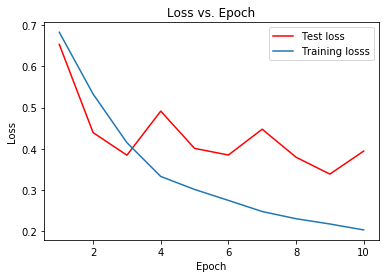

In [25]:
plot_loss(historyBi)   

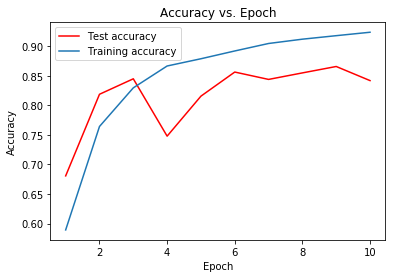

In [34]:
plot_accuracy(historyBi)

In [11]:
RNN_deep = Sequential()
## First add an embedding layer
RNN_deep.add(Embedding(max_features, 32))
## Now add an RNN layers
RNN_deep.add(SimpleRNN(32, return_sequences = True))
RNN_deep.add(SimpleRNN(32, return_sequences = True))
RNN_deep.add(SimpleRNN(32, recurrent_dropout=0.5))
## And the classifier layer
RNN_deep.add(Dense(1, activation = 'sigmoid'))
RNN_deep.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['acc'])
RNN_deep.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


In [12]:
HistoryRNN_deep = RNN_deep.fit(train_text, train_labels,
                   epochs = 10,
                   batch_size = 1024,
                   validation_data = (test_text, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 40s 2ms/step - loss: 0.7823 - acc: 0.4976 - val_loss: 0.7539 - val_acc: 0.5003
Epoch 2/10
25000/25000 [==============================] - 43s 2ms/step - loss: 0.7687 - acc: 0.5003 - val_loss: 0.7302 - val_acc: 0.5018
Epoch 3/10
25000/25000 [==============================] - 43s 2ms/step - loss: 0.7522 - acc: 0.4978 - val_loss: 0.7111 - val_acc: 0.5016
Epoch 4/10
25000/25000 [==============================] - 41s 2ms/step - loss: 0.7415 - acc: 0.4981 - val_loss: 0.7091 - val_acc: 0.5022
Epoch 5/10
25000/25000 [==============================] - 42s 2ms/step - loss: 0.7289 - acc: 0.5075 - val_loss: 0.7054 - val_acc: 0.4978
Epoch 6/10
25000/25000 [==============================] - 44s 2ms/step - loss: 0.7210 - acc: 0.5089 - val_loss: 0.7031 - val_acc: 0.5004
Epoch 7/10
25000/25000 [==============================] - 44s 2ms/step - loss: 0.7177 - acc: 0.5076 - val_loss: 0.6998 - val_acc

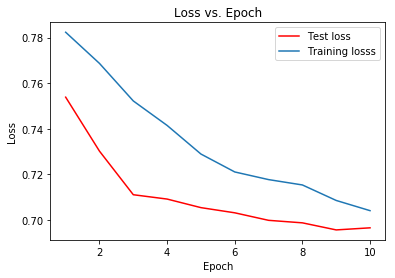

In [14]:
plot_loss(HistoryRNN_deep) 

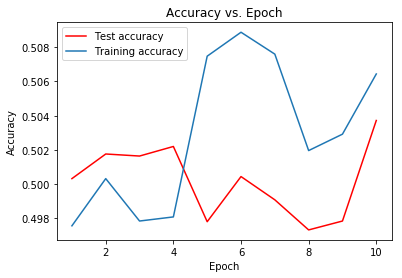

In [15]:
plot_accuracy(HistoryRNN_deep) 

#### Copyright 2018, Stephen F Elston. All rights reserved. 